In [2]:
#implementation of KNN algorithm
import pandas as pd
from sklearn.model_selection import train_test_split



In [3]:
import matplotlib.pyplot as plt
import numpy as np
data1 = pd.read_csv('Admission_Predict_Ver1.1.csv')

y=data1.Admit
X=data1.drop('Admit',axis=1)
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#y.head

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=12)

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
#print(confusion_matrix(y_test,pred))
%matplotlib inline


In [4]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data=data.drop('Serial No.',axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Admit
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [5]:
from sklearn.model_selection import train_test_split
x=data.drop('Admit',axis=1)
y=data.Admit

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Train 
Train and select models in this phase. 

I am using KNN for now.

You can use any model you prefer

In [6]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
neigh.score(x_test,y_test)

0.71

# Save for making predictions
Set the model variable with the model of your choice

In [7]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train, y_train)
neigh.score(x_test,y_test)

0.71

In [8]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)
neigh.score(x_test,y_test)
pred = neigh.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[35  7]
 [18 40]]
              precision    recall  f1-score   support

           0       0.66      0.83      0.74        42
           1       0.85      0.69      0.76        58

   micro avg       0.75      0.75      0.75       100
   macro avg       0.76      0.76      0.75       100
weighted avg       0.77      0.75      0.75       100



In [9]:
neigh = KNeighborsClassifier(n_neighbors=22)
neigh.fit(x_train, y_train)
neigh.score(x_test,y_test)
pred = neigh.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[34  8]
 [17 41]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        42
           1       0.84      0.71      0.77        58

   micro avg       0.75      0.75      0.75       100
   macro avg       0.75      0.76      0.75       100
weighted avg       0.77      0.75      0.75       100



In [10]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train, y_train)
neigh.score(x_test,y_test)
pred = neigh.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[34  8]
 [17 41]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        42
           1       0.84      0.71      0.77        58

   micro avg       0.75      0.75      0.75       100
   macro avg       0.75      0.76      0.75       100
weighted avg       0.77      0.75      0.75       100



In [11]:
model= neigh
model.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [12]:
prediction=neigh.predict(x_test)
print(prediction)
print(y_test.shape)
x_test.shape
y_test.shape

[1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0
 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0
 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0]
(100,)


(100,)

In [13]:
#plt.figure()
#plt.scatter(y_test,prediction)


#plt.xlabel('true values')
#plt.ylabel('Prediction')

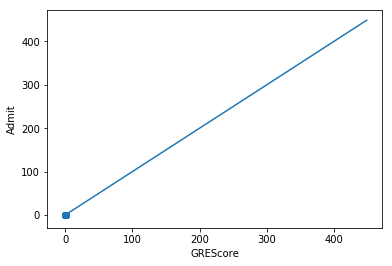

In [14]:
plt.xlabel('GREScore')
plt.ylabel('Admit')
plt.plot(range(450), range(450))
plt.scatter(y_test,pred)
plt.savefig('abc11.jpg')
plt.show()

In [15]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

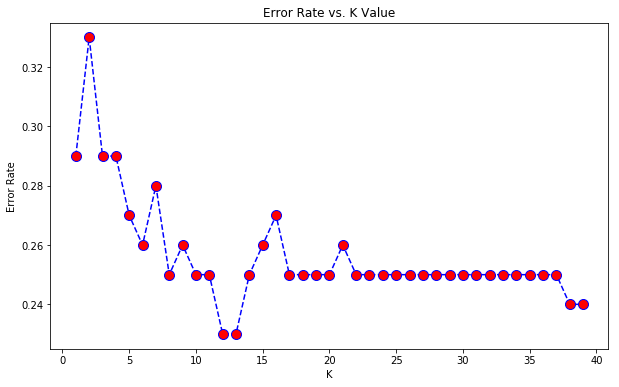

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('knn_rate.png')
plt.show()




In [18]:
from joblib import dump
dump(model,'model1.jbl')

['model1.jbl']

In [19]:
#plt.scatter(y_test,p)

In [20]:
#implementation of K means algorithm
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [21]:
# Importing the dataset
data = pd.read_csv('Admission_Predict.csv')
data=data.drop('Serial No.',axis=1)
data.head()


,GREScore,TOEFLScore,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


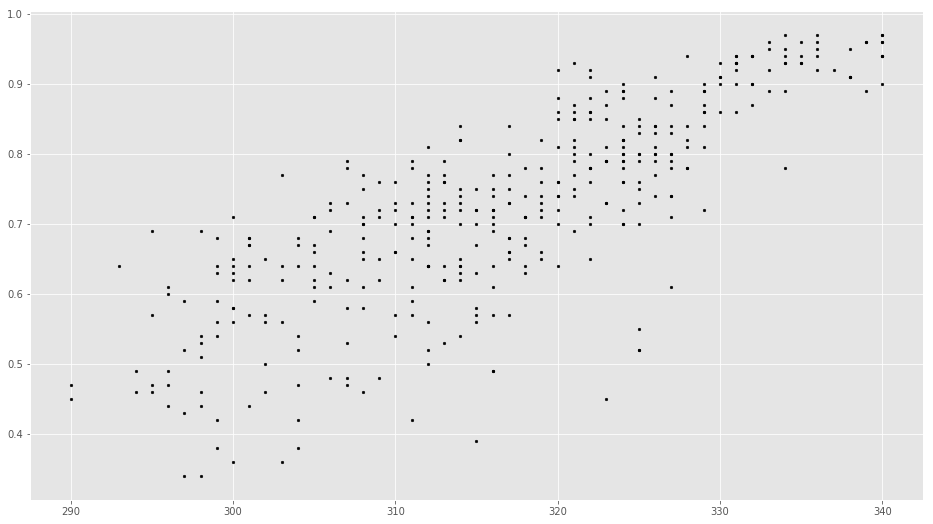

In [22]:
# Getting the values and plotting it
f1 = data['GREScore'].values
f2 = data['Admit '].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
plt.show()
